In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow_hub
!pip install matplotlib
!pip install os
!pip install re
!pip install numpy
!pip install pandas
!pip install scikit-learn


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [ ]:
def embed(texts):
    return model(texts)

In [ ]:
embed(["This movie was the worst movie i've seen!"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 1.37485741e-02, -4.90781059e-03, -1.15424469e-02,
         6.14308417e-02,  2.43924023e-03,  1.93421599e-02,
         1.26169287e-02, -4.70103286e-02,  5.61182685e-02,
        -3.20737362e-02,  6.77125454e-02,  2.59997752e-02,
         2.69963667e-02,  3.09943203e-02,  2.25745775e-02,
        -4.85483222e-02,  3.43854241e-02, -4.92093095e-04,
         4.94713634e-02, -1.41213834e-02,  4.73141968e-02,
        -8.90925005e-02, -7.68019930e-02,  4.50694151e-02,
         6.58751205e-02, -4.16735075e-02, -3.04965544e-02,
        -4.36450653e-02, -7.83606395e-02,  8.90953094e-02,
        -1.85476895e-03,  4.09781411e-02, -5.61597990e-03,
        -6.03759252e-02, -4.40226533e-02, -1.49736321e-02,
         5.65997958e-02, -1.68325212e-02,  1.28833763e-02,
         5.02217263e-02,  2.65723169e-02,  4.40999120e-02,
        -8.90635997e-02,  5.33352718e-02, -2.66615916e-02,
        -2.58626193e-02, -3.00804861e-02,  5.66904759e-03,
      

In [ ]:
df = pd.read_csv("Top_10000_Movies.csv", engine="python")
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [ ]:
df = df[["original_title", "overview"]]
df.head()

,original_title,overview
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...
1,Eternals,The Eternals are a team of ancient aliens who ...
2,Dune,"Paul Atreides, a brilliant and gifted young ma..."
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...
4,Free Guy,A bank teller called Guy realizes he is a back...


In [ ]:
df = df.dropna()
df = df.reset_index()
df = df[:10000]

In [ ]:
titles = list(df['overview'])

In [ ]:
titles[:2]

['After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.',
 'The Eternals are a team of ancient aliens who have been living on Earth in secret for thousands of years. When an unexpected tragedy forces them out of the shadows, they are forced to reunite against mankind’s most ancient enemy, the Deviants.']

In [ ]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (9900, 512)


In [ ]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

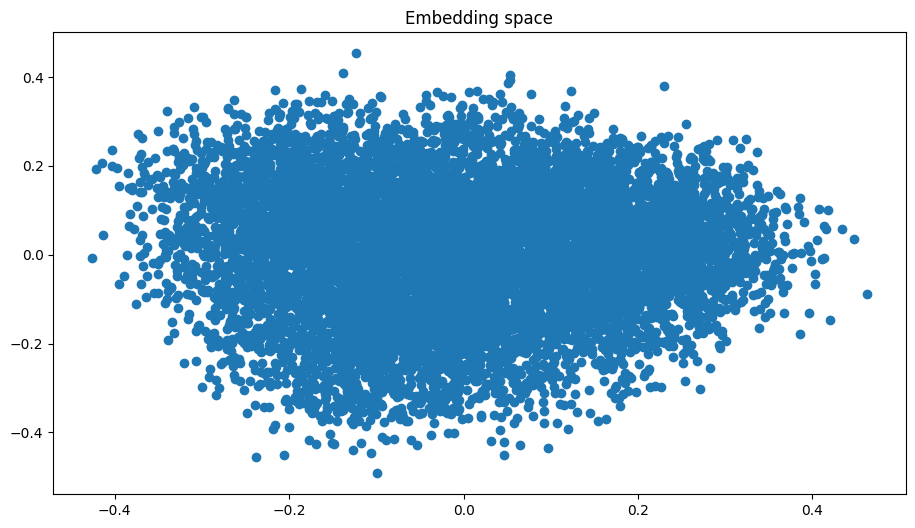

In [ ]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [ ]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['original_title'].iloc[neighbors].tolist()

In [ ]:
print('Recommended Movies:')
recommend("avengers")

Recommended Movies:


['Captain America: Civil War',
 'Iron Man & Captain America: Heroes United',
 'Thor: Love and Thunder',
 'Avengers: Endgame',
 'Ant-Man and the Wasp: Quantumania',
 'Iron Man & Hulk: Heroes United',
 'Marvel Studios: Assembling a Universe',
 'LEGO Marvel Super Heroes: Guardians of the Galaxy - The Thanos Threat',
 'Hulk vs. Thor',
 'LEGO Marvel Super Heroes: Avengers Reassembled!']

In [ ]:
def recommend(text):
    emb = embed([text])  # Gera embeddings para o texto
    neighbors = nn.kneighbors(emb, return_distance=False)[0]  # Encontra vizinhos mais próximos
    return df['original_title'].iloc[neighbors].tolist()  # Retorna os títulos recomendados

# Loop para entrada do usuário
while True:
    user_input = input("Digite um texto para recomendação (ou 'exit' para sair): ")

    if user_input.lower() == "exit":  # Verifica se o usuário deseja sair
        print("Encerrando o programa. Até mais!")
        break

    try:
        recommendations = recommend(user_input)  # Chama a função de recomendação
        print("Recomendações:")
        for rec in recommendations:
            print(f"- {rec}")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
